<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/C%C3%B3pia_de_AULA_27_Regress%C3%A3o_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 27 - Regressão - Prática

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Sobre o conjunto de dados

Queremos estimar (variável alvo o valor médio das casas nos distritos da Califórnia, considerando os seus atributos como

- MedInc : renda média na região
- HouseAge : idade da casa
- AveRooms e AveBedrms : numero médio de salas / quartos
- Population: qtd de pessoas na região
- AveOccup: ocupação média da casa
- Latitude
- Longitude

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = pd.Series(housing.target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Análise Exploratória

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: xlabel='target', ylabel='Count'>

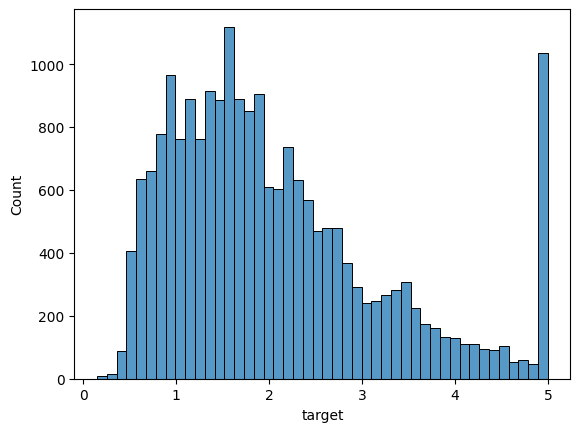

In [ ]:
sns.histplot(data=df,x='target')

<Axes: xlabel='MedInc', ylabel='target'>

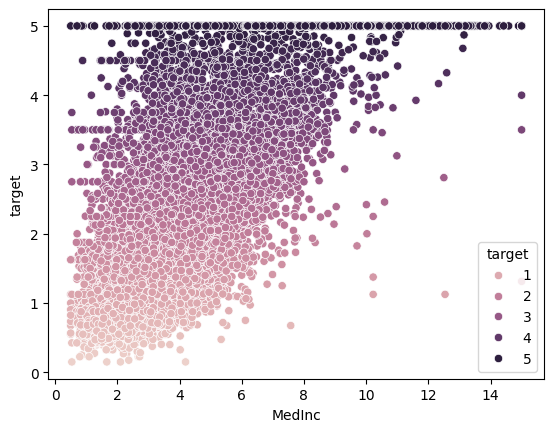

In [ ]:
sns.scatterplot(data=df,x='MedInc',y='target', hue='target')

<Axes: xlabel='HouseAge', ylabel='target'>

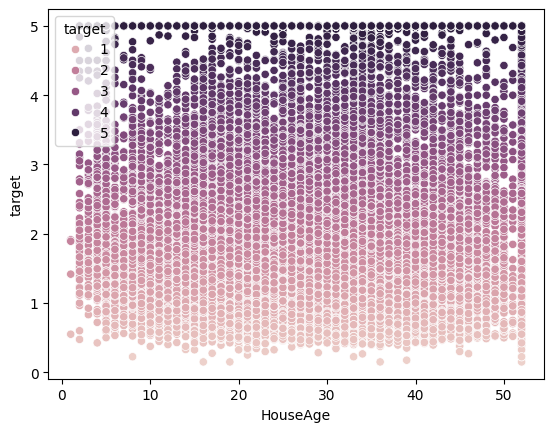

In [ ]:
sns.scatterplot(data=df,x='HouseAge',y='target', hue='target')

<Axes: xlabel='Latitude', ylabel='target'>

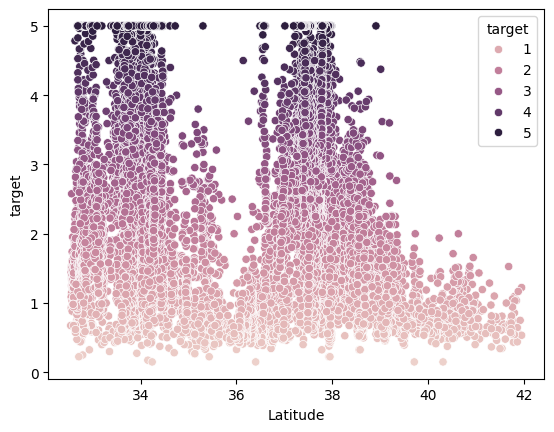

In [ ]:
sns.scatterplot(data=df,x='Latitude',y='target', hue='target')

<Axes: xlabel='Longitude', ylabel='target'>

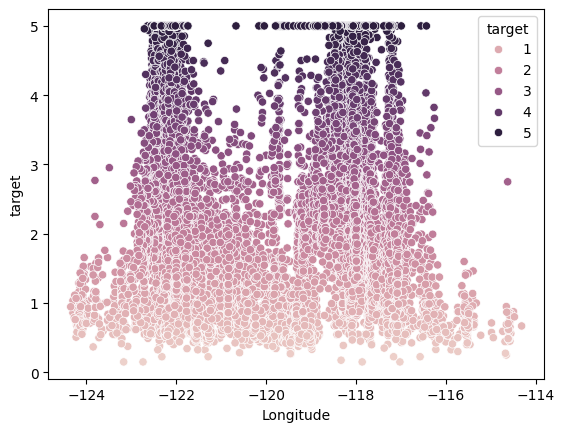

In [ ]:
sns.scatterplot(data=df,x='Longitude',y='target', hue='target')

# Preparando os dados

In [ ]:
X = df.drop('target', axis=1) # todos os atributos, exceto o target
y = df['target'] # apenas o target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Treinando nosso Regressor Linear

In [ ]:
LR = LinearRegression()
LR.fit(X=X_train, y=y_train)

LinearRegression()

Estimando valores no conjunto de teste

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
y_pred

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

# Avaliação

Comparando o valor real/esperado com o valor predito

In [ ]:
X_test['y_true'] = y_test
X_test['y_pred'] = y_pred
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y_true,y_pred
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,0.724128
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,1.766778
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,2.711516
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,2.836012
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,2.603755
...,...,...,...,...,...,...,...,...,...,...
5363,6.6260,51.0,5.532213,0.974790,771.0,2.159664,34.04,-118.42,5.00001,3.577850
19755,2.1898,30.0,4.509091,0.945455,410.0,2.484848,40.18,-122.21,0.63200,0.567699
4885,2.1667,37.0,3.272152,1.056962,2173.0,4.584388,34.02,-118.26,1.17700,1.723822
13043,6.8869,6.0,7.382385,1.030075,2354.0,2.528464,38.51,-121.06,2.63100,2.346893


Avaliando com R2

In [ ]:
metrics.r2_score(y_test, y_pred)

0.5910509795491354

Avaliando com MSE

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

0.5411287478470685

Recuperando os coeficientes

In [ ]:
LR.coef_

array([ 4.47600069e-01,  9.56752596e-03, -1.24755956e-01,  7.94471254e-01,
       -1.43902596e-06, -3.44307993e-03, -4.18555257e-01, -4.33405135e-01])

In [ ]:
LR.intercept_

-37.02782758526926

Comparando com um Regressor Dummy

In [ ]:
import numpy as np

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)

print('R2: ',metrics.r2_score(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

R2:  -3.8775657694056775e-05
MSE:  1.3232694135654075


In [ ]:
X = df.drop('target', axis=1) # todos os atributos, exceto o target
y = df['target'] # apenas o target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

regressors = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    }

for regressor_name, regressor in regressors.items():
  print('Regressor:',regressor_name)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('R2:',metrics.r2_score(y_test, y_pred))
  print('---')

Regressor: LinearRegression
R2: 0.5910509795491354
---
Regressor: DecisionTreeRegressor
R2: 0.6076752375856808
---
